In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':1,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Industries'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-28 to 2019-06-28 - 62'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
XLP,64,2.311191,1.542326,1.390449,4.021399
XAR,64,3.183681,2.504773,1.204506,6.155941
VDC,64,1.826458,1.556243,1.066537,4.396198
ITB,64,3.293078,4.034587,0.774903,5.964365
IGF,64,1.541644,1.880289,0.731258,2.242252
VPU,64,1.405304,1.757756,0.704669,3.258989
XLU,64,1.436123,1.834052,0.692160,3.426057
EMLP,64,1.123074,1.484670,0.644189,2.697335
ITA,64,1.762432,2.779146,0.574193,6.911840


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['XLP'] 0.21383095759998616 0.6 0.8042797087596598 1.3904487511596737
['XLP', 'XAR'] 0.016846137990937704 0.2965894857745244 1.0177339859394912 1.2974773337230778
['XLP', 'VPU'] -0.17707754713020807 0.1424428437523826 0.7280387258630757 1.0475591167456664
['XAR', 'EMLP'] -0.3966757383317262 -0.3576560805497352 0.8853275959516829 0.9243472537336739


['XAR', 'EMLP']

In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['XAR', 'EMLP'], sr=0)

['XAR', 'EMLP'] 0.5276715154019477 -0.3576560805497352 0.8853275959516829 0.9243472537336739
['XAR', 'EMLP', 'XLP', 'VDC'] 0.3853914698233097 0.3218478693628613 0.8635436004604484 1.0764200653160845
['XAR', 'EMLP', 'XLP', 'ITB'] 0.338455747272311 0.19650379688628505 0.941951950386026 1.0035114418388467
['XAR', 'EMLP', 'XLP', 'IGF'] 0.22755284329668046 0.271706519788953 0.7558463235077275 0.992600380791991
['XAR', 'EMLP', 'XLP', 'VPU'] 0.1678817032873324 0.1611985423799532 0.8066831609073792 0.9859531852396701
['XAR', 'EMLP', 'ITB', 'IGF'] 0.16631971394037787 0.11332509240229578 0.8529946215380821 0.838713820184164
['XAR', 'EMLP', 'ITB', 'VPU'] 0.09107284754425754 -0.012758611393476374 0.903831458937734 0.8320666246318431


['XAR', 'EMLP', 'ITB', 'VPU']

In [6]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 6, ['XAR', 'EMLP', 'ITB', 'VPU'], sr=0)

['XAR', 'EMLP', 'ITB', 'VPU'] 0.09107284754425754 -0.012758611393476374 0.903831458937734 0.8320666246318431
['XAR', 'EMLP', 'ITB', 'VPU', 'XLP'] -0.18058167512536877 0.13549721597251235 0.8839211089021191 0.9437430499374091
['XAR', 'EMLP', 'ITB', 'VPU', 'XLP', 'VDC'] -0.46823607894927655 0.24862308010249623 0.8831408409482273 0.9642087087207271
['XAR', 'EMLP', 'ITB', 'VPU', 'XLP', 'IGF'] -0.5682822040697316 0.22037513961718855 0.8113426563130799 0.9083289190379981
['XAR', 'EMLP', 'ITB', 'VPU', 'XLP', 'XLU'] -0.5844765131899581 0.16472066559321377 0.8508028212168283 0.9018125002147941
['XAR', 'EMLP', 'ITB', 'VPU', 'IGF', 'XLU'] -0.6086765502182481 0.19982551446355298 0.791497935318199 0.7919474191116723


['XAR', 'EMLP', 'ITB', 'VPU', 'IGF', 'XLU']

In [9]:
quote.setup_mask(['XAR', 'EMLP', 'ITB', 'VPU'])
quote.find_optimal_ratio(21, 2, .95)

({'XAR': 0.23, 'EMLP': 0.48, 'ITB': 0.06, 'VPU': 0.17}, 1.7375, 0.967)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,1.786256,1.045399,-0.740692,1.112564,1.865555,2.389763,4.312369,1.549255,2.410674
XAR,64.0,3.183681,2.504773,-4.055186,1.444668,3.488113,4.875712,7.885071,1.204506,6.155941
ITB,64.0,3.293078,4.034587,-3.981024,0.743688,2.251743,7.082778,13.079428,0.774903,5.964365
IGF,64.0,1.541644,1.880289,-1.714665,0.144990,1.143750,2.997959,5.352718,0.731258,2.242252
VPU,64.0,1.405304,1.757756,-1.713539,0.046302,1.384789,2.862357,5.136484,0.704669,3.258989
EMLP,64.0,1.123074,1.484670,-1.655893,0.020241,1.286195,1.960826,4.008010,0.644189,2.697335


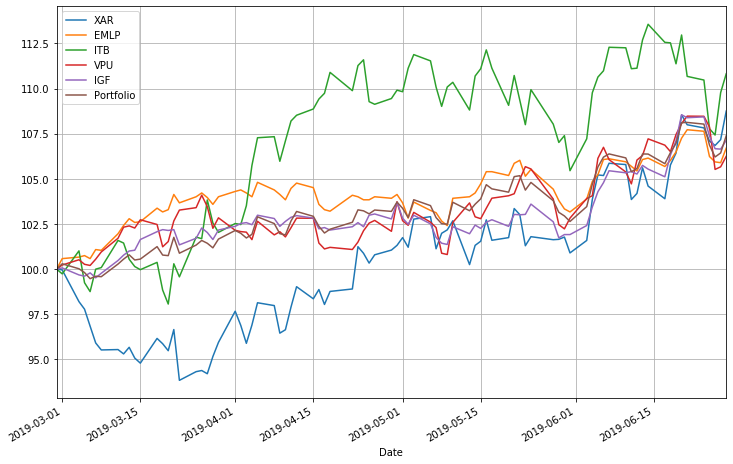

In [11]:
%pylab inline
quote.setup_mask(['XAR', 'EMLP', 'ITB', 'VPU', 'IGF'])
quote.graph(21, {'IGF': .05, 'XAR': 0.24, 'EMLP': 0.48, 'ITB': 0.06, 'VPU': 0.17})